In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_arch
import arch


In [ ]:
data = pd.read_csv('../Datasets/starbucks.csv', index_col=0, usecols=[0,1], parse_dates=True)#(, index_col=0, usecols=[0,1], parse_dates=True)
data.columns = ['close']
# data = data.loc[data.ultimoPrecio>0]
# data = data.iloc[:650]
data.head()

,close
Date,
2024-03-28,91.39
2024-03-27,91.50
2024-03-26,90.36
2024-03-25,90.67
2024-03-22,90.71


<AxesSubplot:xlabel='Date'>

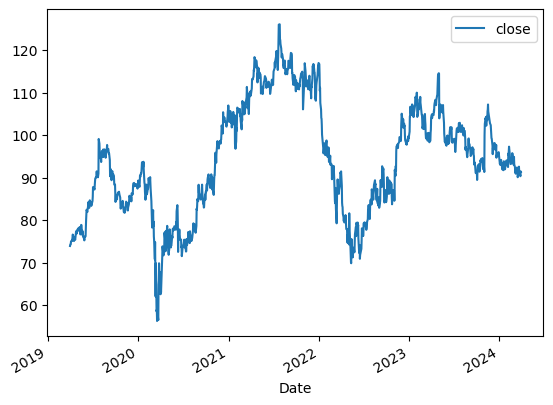

In [ ]:
data.plot()

Text(0.5, 1.0, 'Rendimiento cuadrado')

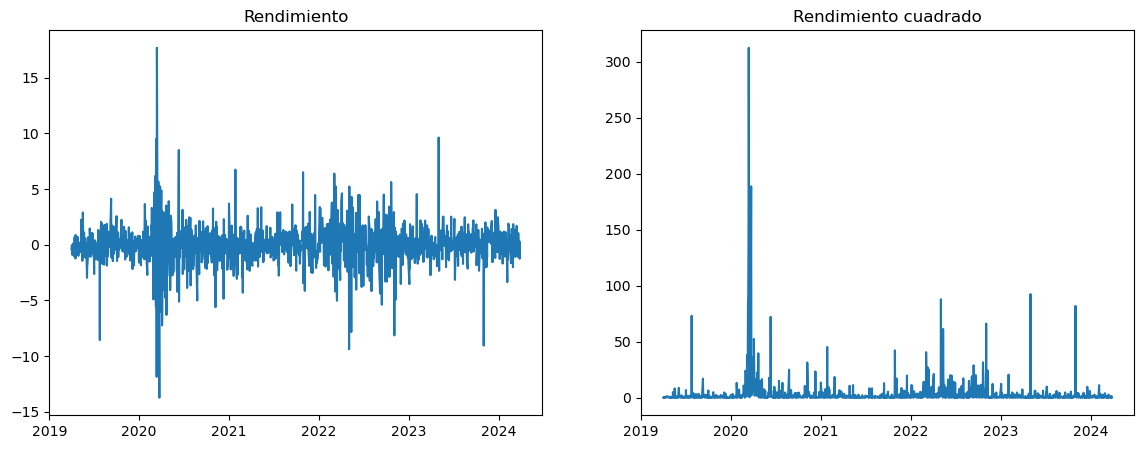

In [ ]:
precio = data.close
log_precio = np.log(precio)
r_t = 100*log_precio.diff(1).dropna() #drop first element (is NaN)
fig, ax = plt.subplots(1,2, figsize = (14,5))
ax[0].plot(r_t)
ax[0].set_title('Rendimiento')
ax[1].plot(r_t**2)
ax[1].set_title('Rendimiento cuadrado')


## Tests de heterocedasticidad

[Engle’s Test for Autoregressive Conditional Heteroskedasticity](https://hal.science/hal-00302471/document). Buscamos rechazar el test.

In [ ]:
het_arch(r_t-r_t.mean())

(293.1578934684233,
 4.340895885321428e-57,
 37.98775015757556,
 2.2692119210431814e-65)

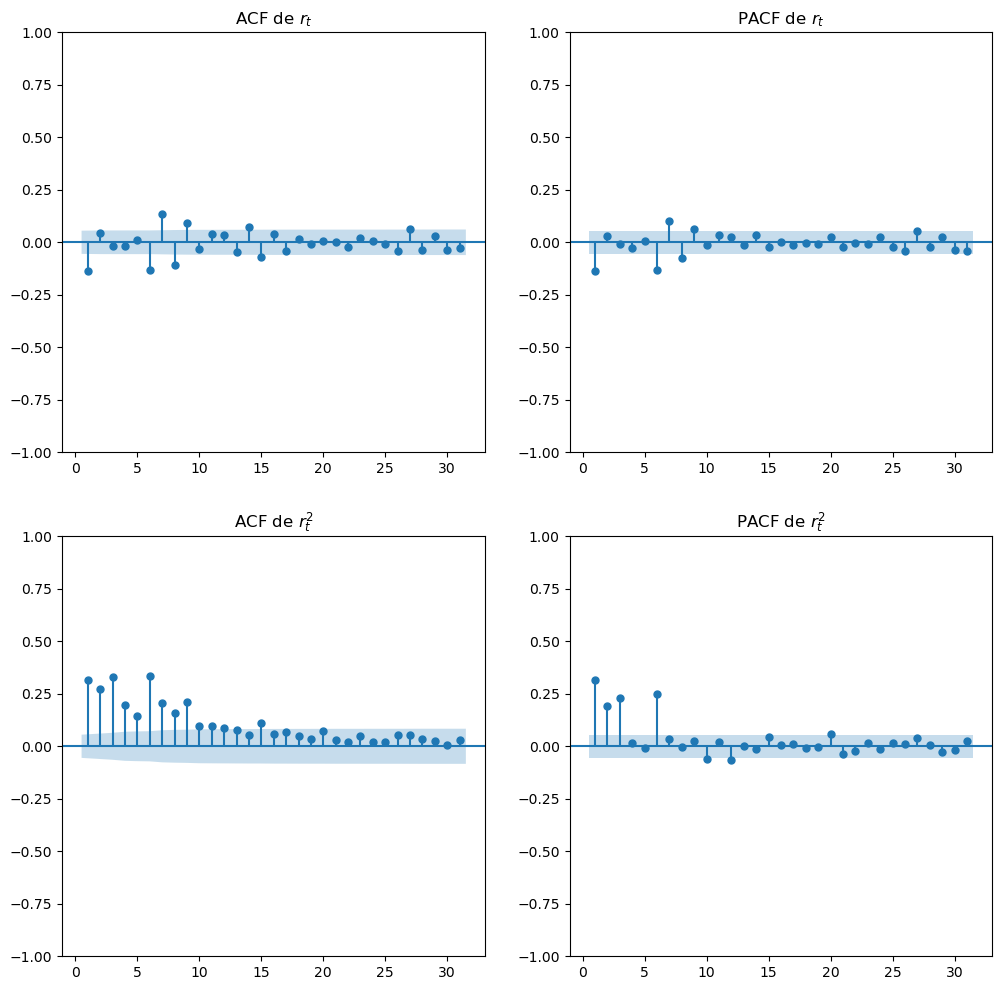

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
plot_acf(r_t, zero=False, title='ACF de $r_t$', ax=ax[0,0])
plot_pacf(r_t, zero=False, title='PACF de $r_t$', method='ywm', ax=ax[0,1])
plot_acf(r_t ** 2, zero=False, title='ACF de $r_t^2$', ax=ax[1,0])
plot_pacf(r_t ** 2, zero=False, title='PACF de $r_t^2$', method='ywm', ax=ax[1,1]);

Iteration:      1,   Func. Count:     10,   Neg. LLF: 6057.315584795546
Iteration:      2,   Func. Count:     21,   Neg. LLF: 879179.2056659557
Iteration:      3,   Func. Count:     31,   Neg. LLF: 2566.5391868844513
Iteration:      4,   Func. Count:     42,   Neg. LLF: 2705.75333041243
Iteration:      5,   Func. Count:     52,   Neg. LLF: 2553.7439001392104
Iteration:      6,   Func. Count:     62,   Neg. LLF: 2439.3177892493786
Iteration:      7,   Func. Count:     72,   Neg. LLF: 2423.781453018254
Iteration:      8,   Func. Count:     82,   Neg. LLF: 2409.263140732024
Iteration:      9,   Func. Count:     91,   Neg. LLF: 2409.905099447772
Iteration:     10,   Func. Count:    101,   Neg. LLF: 2409.1989109937376
Iteration:     11,   Func. Count:    110,   Neg. LLF: 2409.192921515863
Iteration:     12,   Func. Count:    119,   Neg. LLF: 2409.191512299217
Iteration:     13,   Func. Count:    128,   Neg. LLF: 2409.191402674988
Iteration:     14,   Func. Count:    137,   Neg. LLF: 2409.19

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2409.19
Distribution:                  Normal   AIC:                           4834.38
Method:            Maximum Likelihood   BIC:                           4875.47
                                        No. Observations:                 1257
Date:                Sat, Apr 13 2024   Df Residuals:                     1256
Time:                        13:12:31   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0365  

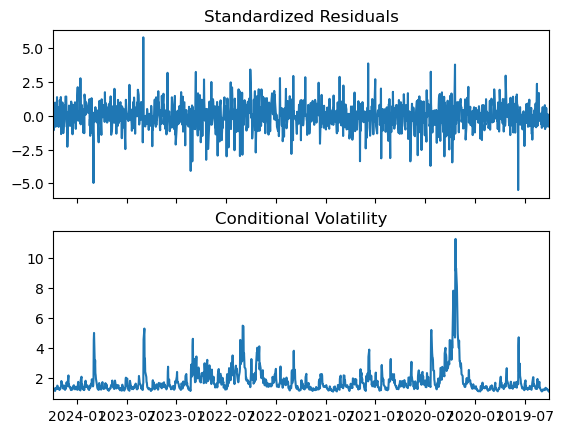

In [ ]:
# Si r^2 sigue un ARMA(max(p, q),p) ==> r sigue un GARCH (p,q)
# Mirando las PACF de r^2 podemos sugerir que max(p,q)=3, por lo que q<=2
# Podemos proponer un GARCH(3,3)
garch = arch.arch_model(r_t, vol='Garch', p=3, q=3)
garch_fitted = garch.fit()
garch_fitted.plot()
garch_fitted.summary

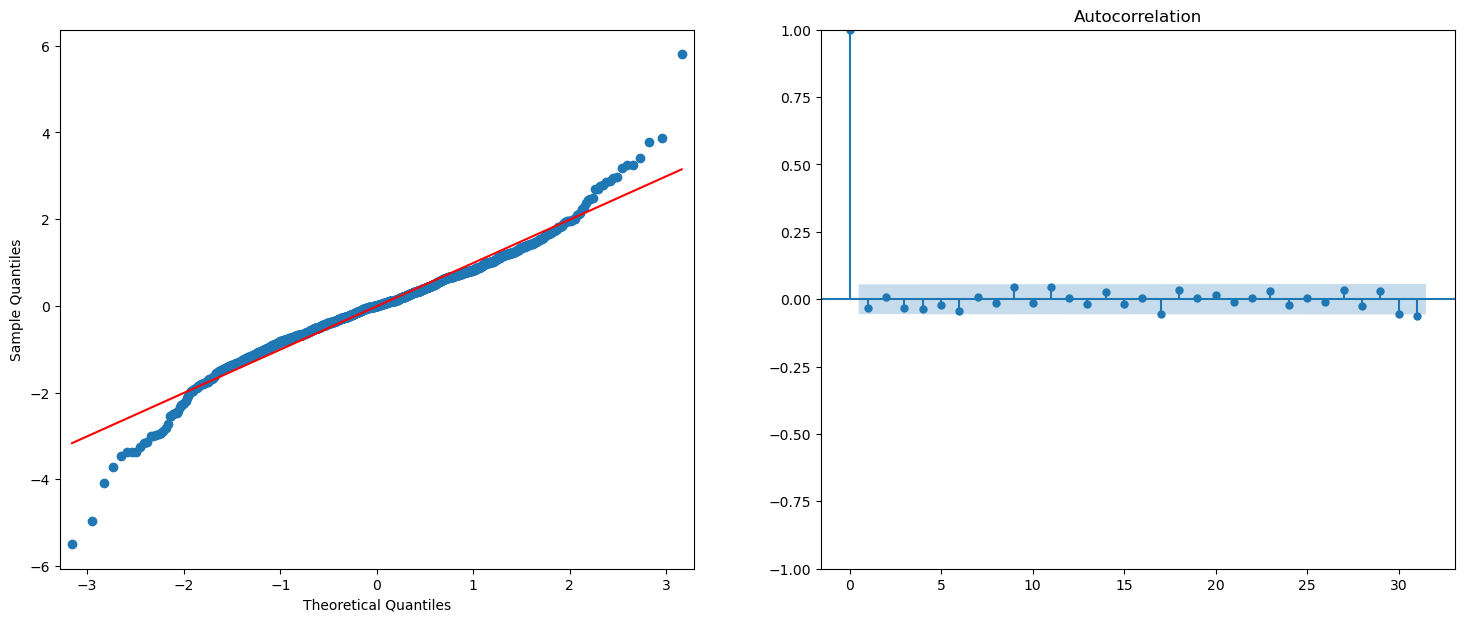

In [ ]:
resid = garch_fitted.std_resid
fig, ax = plt.subplots(1,2, figsize=(18,7))
qqplot(resid, ax=ax[0], line="s")
plot_acf(resid, ax=ax[1]);

## Propongo otro modelo:
Como $\alpha_2$ y $\alpha_3$ no estaban bien estimador, reduzco a p=1, q=1

Iteration:      5,   Func. Count:     34,   Neg. LLF: 2412.6773549489353
Iteration:     10,   Func. Count:     58,   Neg. LLF: 2412.615523317525
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2412.615523317604
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10


<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2412.62
Distribution:                  Normal   AIC:                           4833.23
Method:            Maximum Likelihood   BIC:                           4853.78
                                        No. Observations:                 1257
Date:                Sat, Apr 13 2024   Df Residuals:                     1256
Time:                        13:12:33   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0308  

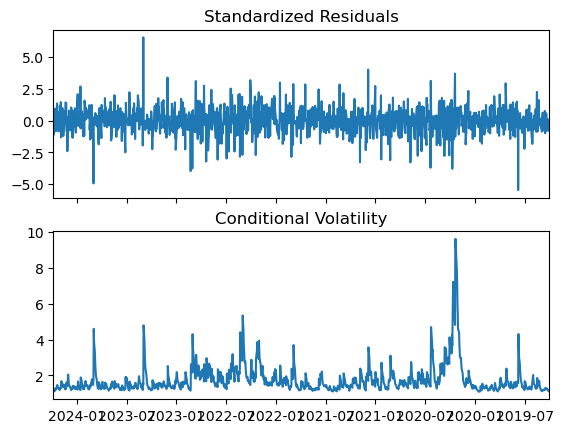

In [ ]:
# Si r^2 sigue un ARMA(max(p, q),p) ==> r sigue un GARCH (p,q)
# Mirando las PACF de r^2 podemos sugerir que max(p,q)=3, por lo que q<=3
# Podemos proponer un GARCH(3,3)
garch2 = arch.arch_model(r_t, vol='GARCH', p=1, q=1)
garch2_fitted = garch2.fit(update_freq=5)
garch2_fitted.plot()
garch2_fitted.summary

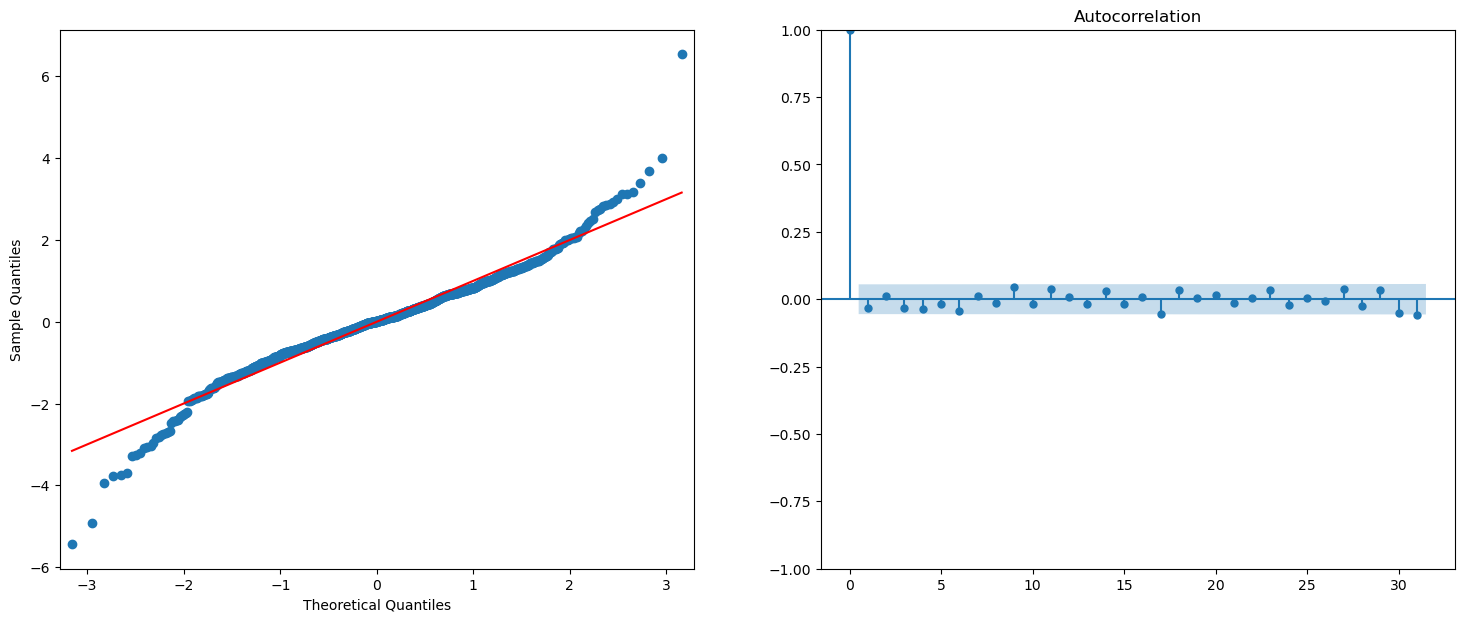

In [ ]:
resid2 = garch2_fitted.std_resid
fig, ax = plt.subplots(1,2, figsize=(18,7))
qqplot(resid2, ax=ax[0], line="s", fit=True)
plot_acf(resid2, ax=ax[1]);

Comparemos los dos modelos

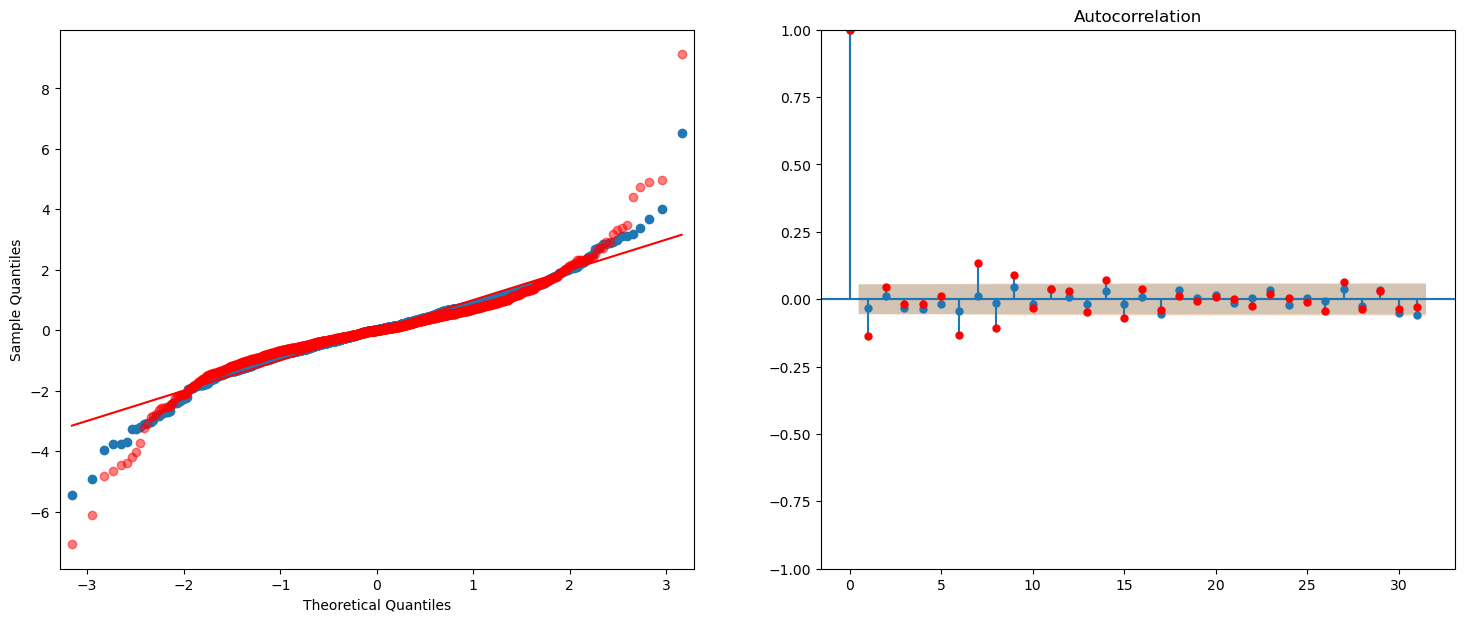

In [ ]:
resid2 = garch2_fitted.std_resid
fig, ax = plt.subplots(1,2, figsize=(18,7))
qqplot(resid2, ax=ax[0], line="s", fit=True)
qqplot(resid, ax=ax[0], markerfacecolor ='red', markeredgecolor='red', alpha=0.5, fit=True)
plot_acf(resid2, ax=ax[1]);
plot_acf(resid, ax=ax[1], markerfacecolor ='red', markeredgecolor='red');